In [1]:
from google.colab import drive
drive.mount('./content/device')

ValueError: Mountpoint must be in a directory that exists

In [6]:
!pip install prophet


In [9]:
# Importing libraries
import pandas as pd  #data analysis
import plotly.express as px # visualization
import prophet #Forecasting


In [13]:
stock_data_df= pd.read_csv('TSLA.csv')

In [14]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
1,2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
2,2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300
3,2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18140500
4,2021-07-12,662.200012,687.239990,662.159973,685.700012,685.700012,25927000
...,...,...,...,...,...,...,...
246,2022-06-27,748.099976,756.210022,727.700012,734.760010,734.760010,29726100
247,2022-06-28,733.450012,749.909973,697.030029,697.989990,697.989990,30130400
248,2022-06-29,691.500000,693.520020,666.820007,685.469971,685.469971,27632400
249,2022-06-30,673.530029,688.369995,656.590027,673.419983,673.419983,31533500


In [15]:
stock_data_df['Date'].min()

'2021-07-06'

In [16]:
px.area(stock_data_df, x = "Date", y= 'Close')

In [17]:
px.line(stock_data_df, x= 'Date', y = 'Close')

In [18]:
px.area(stock_data_df, x= 'Date', y= 'Volume')

In [19]:
px.bar(stock_data_df, y = 'Volume')

In [20]:
px.box(stock_data_df, y = 'Close')

In [21]:
columns = [ 'Date', 'Close']
new_stock_data_df= pd.DataFrame(stock_data_df, columns=columns)
new_stock_data_df


,Date,Close
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


In [24]:
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df


,ds,y
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


In [25]:
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df


,ds,y
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


In [26]:
from prophet import Prophet # import the Prophet class from the prophet module

model = Prophet() # instantiate a Prophet object using the Prophet class
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5n0xz62/5v6tlb39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5n0xz62/8ts3th94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38548', 'data', 'file=/tmp/tmpf5n0xz62/5v6tlb39.json', 'init=/tmp/tmpf5n0xz62/8ts3th94.json', 'output', 'file=/tmp/tmpf5n0xz62/prophet_modelgpl8s2w4/prophet_model-20240921185929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:59:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:59:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)



In [28]:
px.line(forecast, x='ds', y='yhat')


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



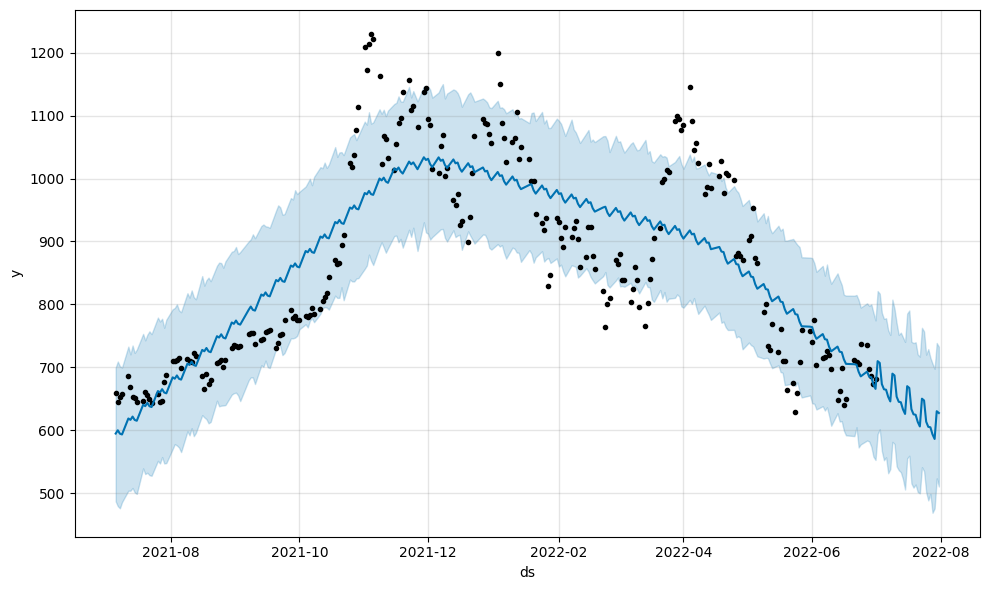

In [29]:
figure=model.plot(forecast,xlabel='ds', ylabel='y')


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



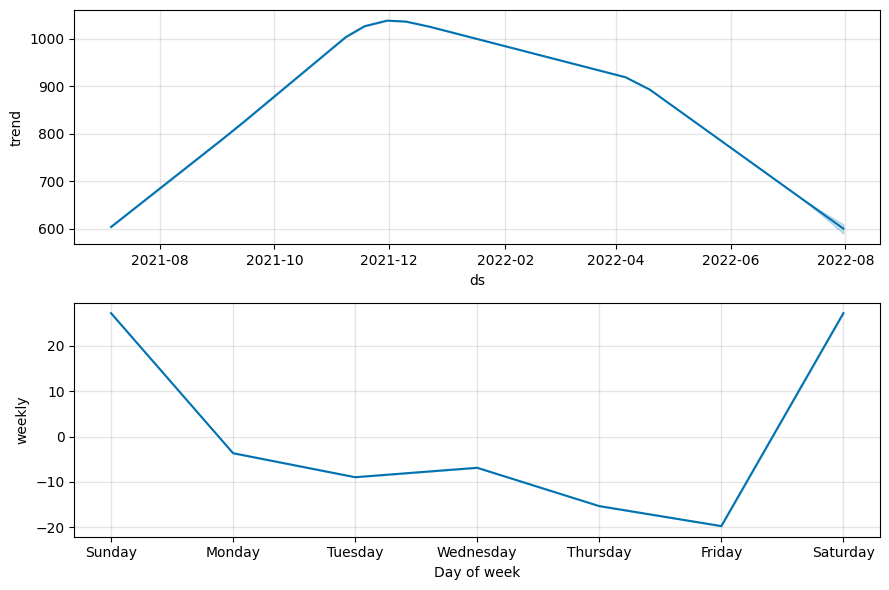

In [30]:
figure2=model.plot_components(forecast)


In [31]:
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>